<a href="https://colab.research.google.com/github/Armadini/CIFAR10_CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

from google.colab import drive
# drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks'
/content


In [ ]:
def load_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Convert y_train, y_test to be a list
    y_train = [y for arr in y_train for y in arr]
    y_test = [y for arr in y_test for y in arr]

    return X_train, y_train, X_test, y_test

In [ ]:
train_images, train_labels, test_images, test_labels = load_data()

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
PERCENT_DATA_USED = 1 # ex. would be .1 for 10% of data

In [ ]:
# Display the shape of the data
print("Train images:", train_images.shape)
print("Train labels:", len(train_labels)) 
print("Test images:", test_images.shape)
print("Test labels", len(test_labels))
print("Number of classes:", len(classes))

Train images: (50000, 32, 32, 3)
Train labels: 50000
Test images: (10000, 32, 32, 3)
Test labels 10000
Number of classes: 10


In [ ]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_image(index):
    print(classes[train_labels[index]])
    plot = plt.imshow(train_images[index])

In [ ]:
idx = 0
show_image(idx)

In [ ]:
X_train = train_images.astype('float32')
X_test = test_images.astype('float32')

# CONVERT DATA FROM 0-255 TO 0-1.0
X_train /= 255
X_test /= 255

# SHUFFLE
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, train_labels)
X_test, y_test = shuffle(X_test, test_labels)

# Downsize based on % of data used
num_training = int(len(train_labels) * PERCENT_DATA_USED)
num_testing = int(len(test_labels) * PERCENT_DATA_USED)

X_train = X_train[:num_training]
X_test = X_test[:num_testing]
y_train = y_train[:num_training]
y_test = y_test[:num_testing]

# One-hot encode the output data
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(len(X_train), len(y_train), len(X_test), len(y_test))
print("y train shape ", y_train.shape)

50000 50000 10000 10000
y train shape  (50000, 10)


In [ ]:
def show_image(index):
    class_id = np.argmax(y_train[index])
    print(classes[class_id])
    plot = plt.imshow(X_train[index])

deer


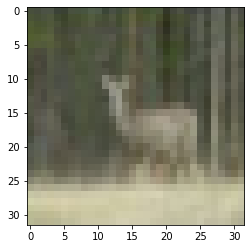

In [ ]:
show_image(20)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
from keras.optimizers import SGD
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/400
781/781 [==============================] - 455s 580ms/step - loss: 2.5695 - accuracy: 0.2316 - val_loss: 1.5338 - val_accuracy: 0.4418
Epoch 2/400
781/781 [==============================] - 448s 574ms/step - loss: 1.6654 - accuracy: 0.3928 - val_loss: 1.4501 - val_accuracy: 0.4648
Epoch 3/400
781/781 [==============================] - 451s 577ms/step - loss: 1.5027 - accuracy: 0.4527 - val_loss: 1.3442 - val_accuracy: 0.5179
Epoch 4/400
781/781 [==============================] - 449s 575ms/step - loss: 1.4042 - accuracy: 0.4878 - val_loss: 1.5268 - val_accuracy: 0.4597
Epoch 5/400
781/781 [==============================] - 457s 585ms/step - loss: 1.3386 - accuracy: 0.5146 - val_loss: 1.2662 - val_accuracy: 0.5384
Epoch 6/400
781/781 [==============================] - 452s 579ms/step - loss: 1.2833 - accuracy: 0.5352 - val_loss: 1.3838 - val_accuracy: 0.5131
Epoch 7/400
781/781 [==============================] - 451s 578ms/step - loss: 1.2441 - accuracy: 0.5503 - val_loss: 1

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("Test loss: ", test_loss, "\nTest accuracy: ", test_acc)

In [ ]:
model.save('final_model.h5')